# Virial Properties

In [5]:
from matplotlib import pyplot as plt
import pandas as pd
from auriga.images import add_redshift, figure_setup
from auriga.paths import Paths
from auriga.parser import parse

In [6]:
figure_setup()

In [11]:
def plot_virial_props_for_galaxy(simulation: str):
    # FIXME: Add documentation.
    galaxy, rerun, resolution = parse(simulation=simulation)

    fig = plt.figure(figsize=(2.0, 4.0))
    gs = fig.add_gridspec(nrows=2, ncols=1, hspace=0.0, wspace=0.0)
    axs = gs.subplots(sharex=True, sharey=False)

    for ax in axs.flatten():
        ax.label_outer()
        ax.grid(True, ls='-', lw=0.25, c='silver')
        ax.tick_params(which='both', direction="in")
        ax.set_xlim(0, 14)
        ax.set_xticks([2, 4, 6, 8, 10, 12, 14])
        ax.set_xlabel('Time [Gyr]')

    axs[0].set_ylim(0, 350)
    axs[0].set_yticks([50, 100, 150, 200, 250, 300])
    axs[0].set_ylabel('$R_{200}$ [ckpc]')

    axs[1].set_ylim(0, 2)
    axs[1].set_yticks([0, 0.5, 1, 1.5])
    axs[1].set_ylabel('$M_{200}$ [$10^{12} \, \mathrm{M}_\odot$]')

    paths = Paths(galaxy, rerun, resolution)
    df = pd.read_csv(f"../{paths.results}temporal_data.csv")
    axs[0].plot(df["Time_Gyr"], df["VirialRadius_ckpc"],
                c='tab:red', lw=1.0, label='Main', zorder=10)
    axs[0].plot(df["Time_Gyr"], df["VirialRadius00_ckpc"],
                c='tab:green', lw=1.0, ls="--", label='H0S0', zorder=11)

    axs[1].plot(df["Time_Gyr"], df["VirialMass_1E10Msun"] / 1E2,
                c='tab:red', lw=1.0, zorder=10)
    axs[1].plot(df["Time_Gyr"], df["VirialMass00_1E10Msun"] / 1E2,
                c='tab:green', lw=1.0, ls="--", zorder=11)

    axs[0].legend(loc='upper left', ncol=1, framealpha=0, fontsize=6.0)

    add_redshift(ax)
    axs[0].text(x=0.95, y=0.95, s=r"$\bf{Au" + str(galaxy) + "}$", size=6.0,
                ha='right', va='top', transform=ax.transAxes,
                bbox={"facecolor": "silver",
                      "edgecolor": "white",
                      "pad": 0.2,
                      "boxstyle": "round",
                      "lw": 1.0})

    plt.show()

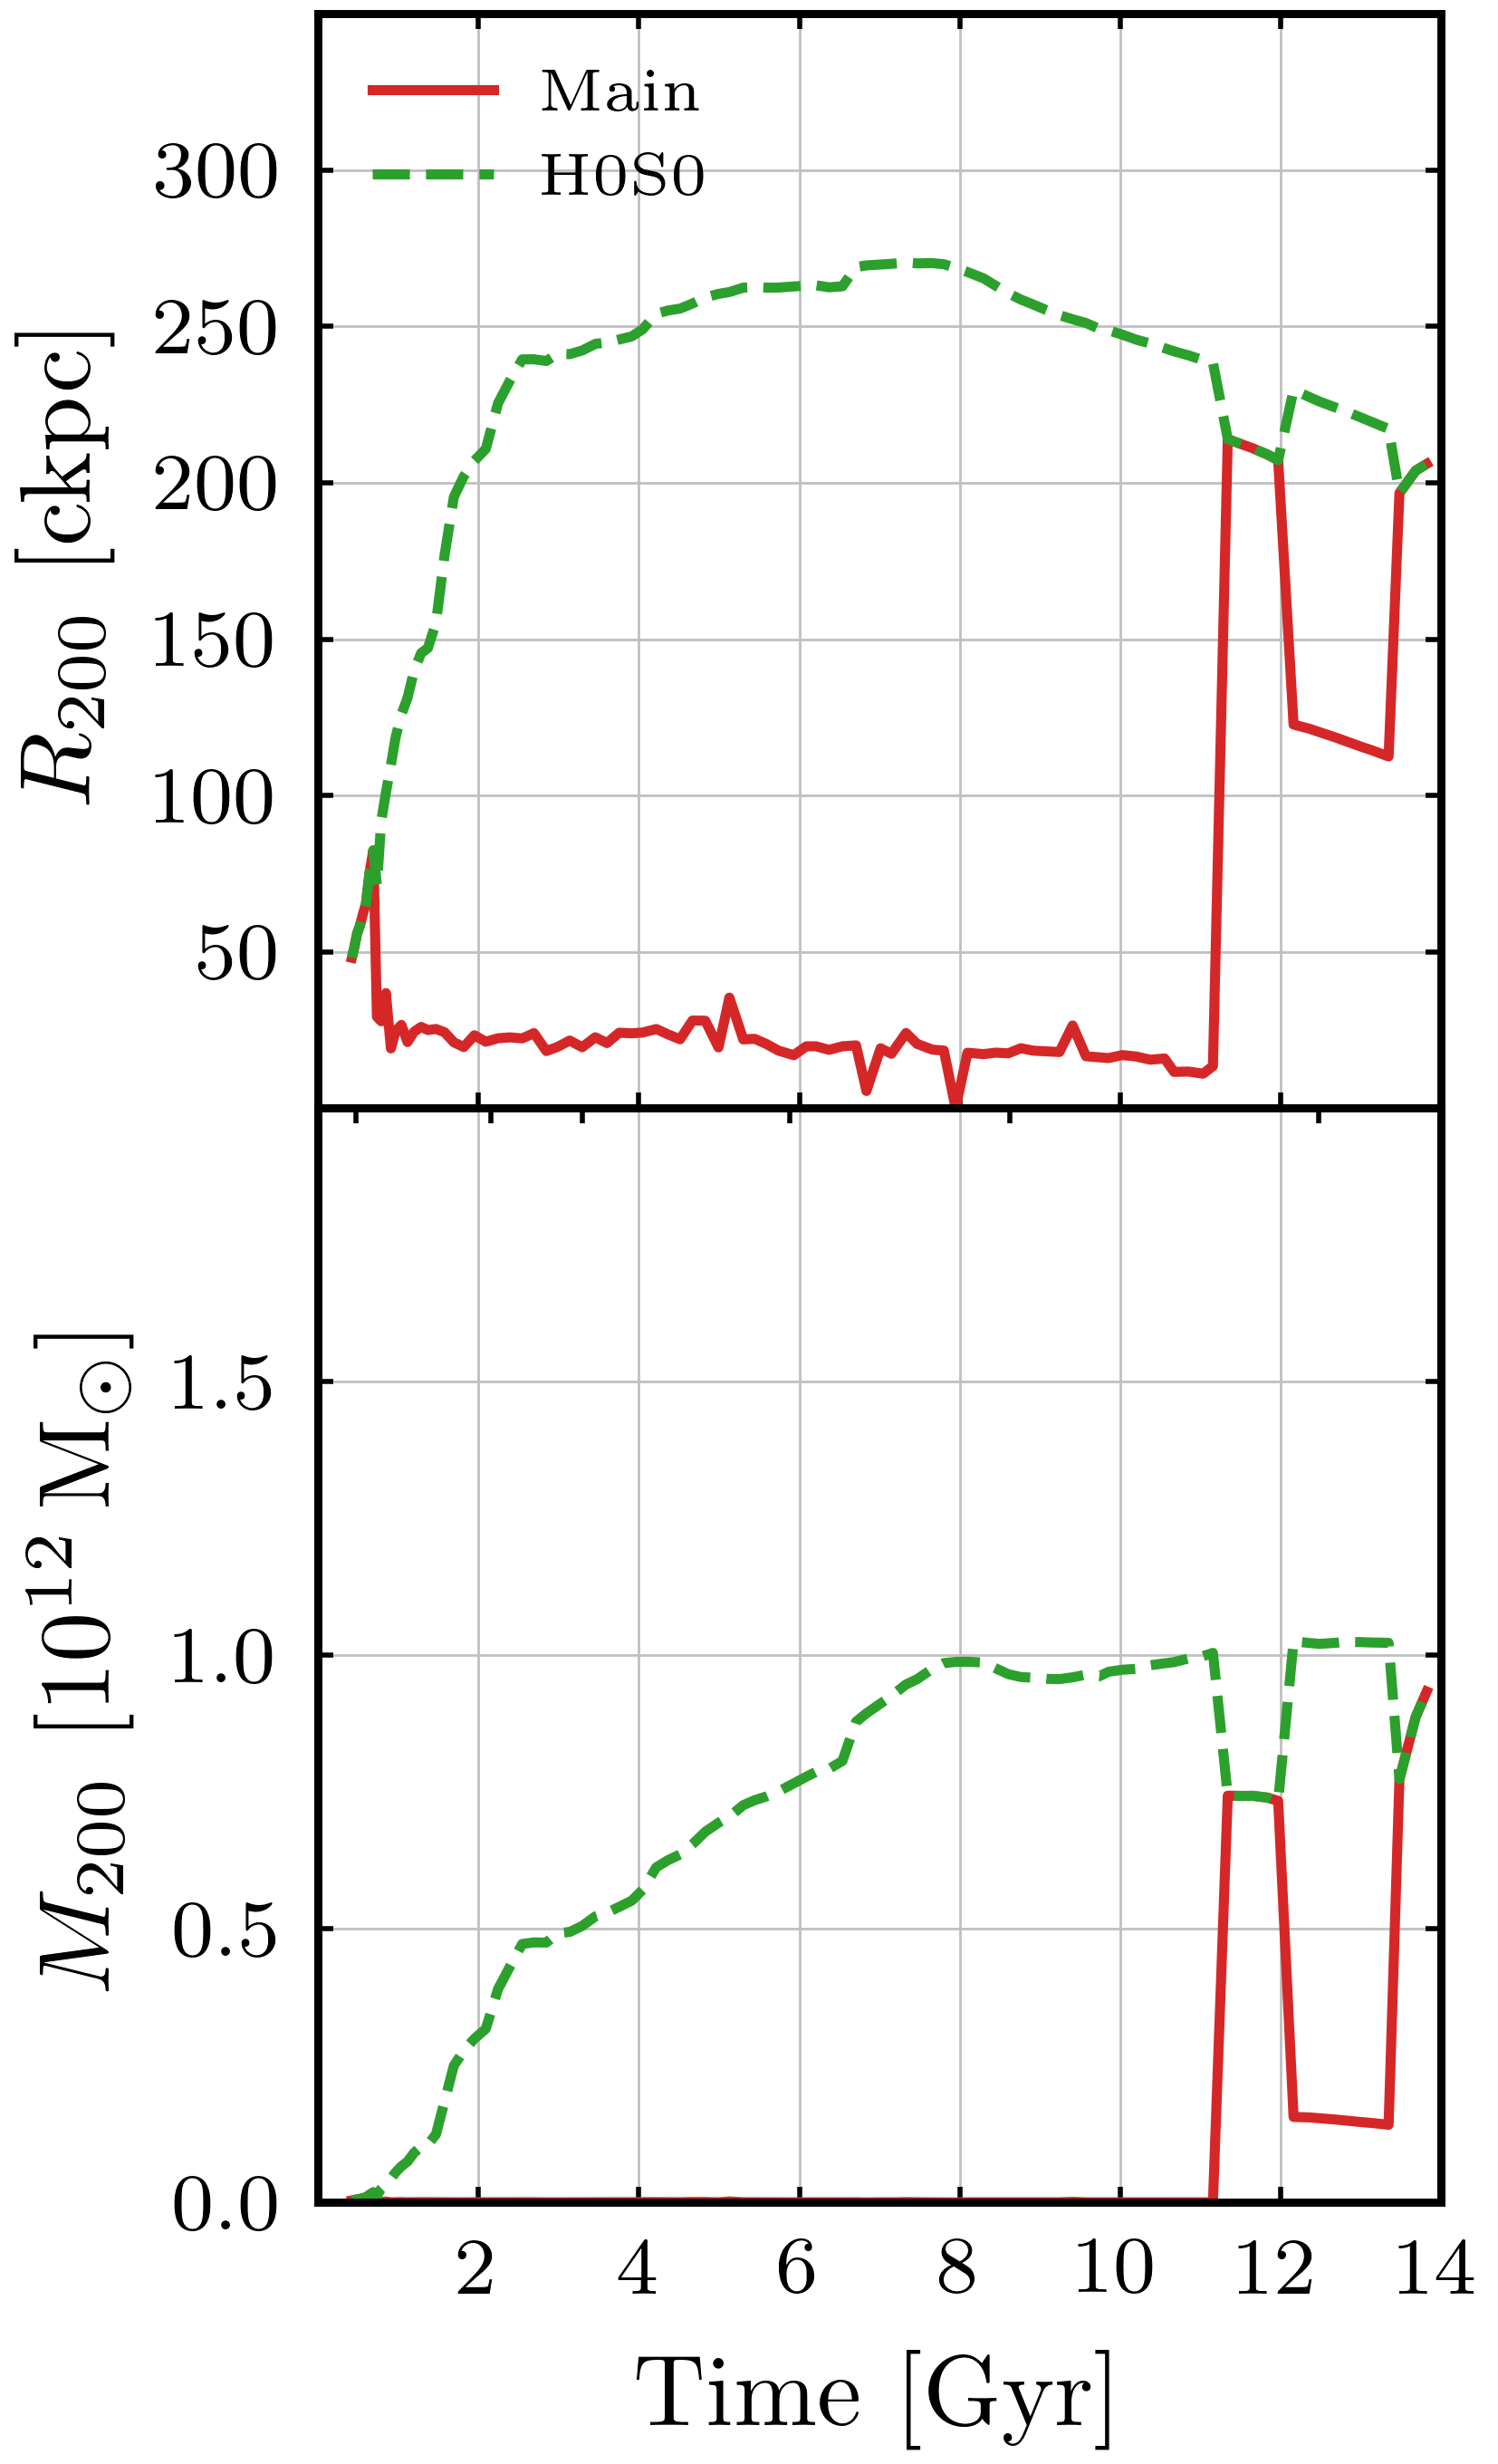

In [12]:
plot_virial_props_for_galaxy(simulation="au1_or_l4")